In [1]:
import tensorflow as tf

d:\Users\Public\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## neural network regression with tensorflow

 #### introduction to regression with neural networks in tensorflow

## creating data to view and fit

In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# create features 

x = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

In [43]:
# create labels 

y =np.array([3.0,6.0,9.0,12.0,15.0,18.,21.0,24.0])

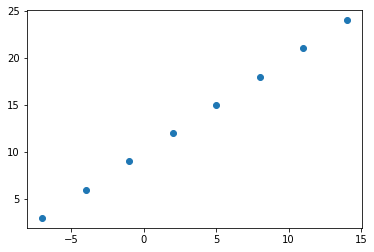

In [44]:
# visualize

plt.scatter(x,y)

In [45]:
y == x +10  # relationship between x and y or relationship between dependent and independent variable

array([ True,  True,  True,  True,  True,  True,  True,  True])

## input and output shapes 

In [46]:
# create a demo tensor for our housing price prediction problem

house_info = tf.constant(['bedroom ','bathroom' , 'garage'])

house_price = tf.constant([939700])

house_info , house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom ', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [47]:
input_shape = x.shape

output_shape = y.shape

input_shape , output_shape

((8,), (8,))

In [48]:
x[0] , y[0]

# we are using one x value to predict the one y value 

(-7.0, 3.0)

so here also we are using one house  as an input to predict the price of one house 

In [49]:
x[0].shape

()

In [50]:
x[0].ndim

0

In [51]:
# turn out numpy arrays into tensors 

x = tf.constant(x)
y = tf.constant(y)

In [52]:
x,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [53]:
x[0].shape # when there is no dimension we will get a scaler value 

TensorShape([])

In [54]:
y[0].shape

TensorShape([])

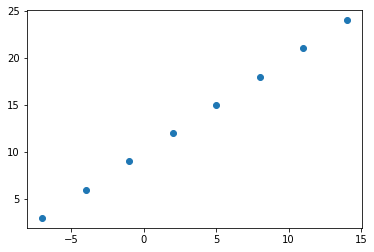

In [55]:
plt.scatter(x,y)

## steps in modeling with tensorflow

 1. create a model  -- define the input and output layers as well as hidden layers of a deep learning model

 2. compiling a model -- define  the loss function (in other words , the function which tells our model how wrong it is ) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of a model)
 
 3. fitting a model -- letting the model try to find patterns between  x and y (features and labels )

In [56]:
# set random seed

tf.random.set_seed(42)

# create a model using the sequential API

model = tf.keras.Sequential(
[
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
]


)



In [57]:
# compile the model 

model.compile(loss=tf.keras.losses.mae,optimizer = tf.keras.optimizers.SGD(),metrics =['mae'])

In [58]:
# fit the model

model.fit(x,y,epochs=5)  

Epoch 1/5


ValueError: in user code:

    File "d:\Users\Public\lib\site-packages\keras\src\engine\training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "d:\Users\Public\lib\site-packages\keras\src\engine\training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\Users\Public\lib\site-packages\keras\src\engine\training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "d:\Users\Public\lib\site-packages\keras\src\engine\training.py", line 1126, in train_step
        y_pred = self(x, training=True)
    File "d:\Users\Public\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "d:\Users\Public\lib\site-packages\keras\src\engine\input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_3' (type Sequential).
    
    Input 0 of layer "dense_4" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_3' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=float64)
      • training=True
      • mask=None


here the error is because of less dimensions of the tensor and the we have created the tensors through arrays so the dtype is float64 and we need to convert it into float 32

In [59]:
x = tf.cast(x,dtype=tf.float32)
y = tf.cast(y,dtype=tf.float32)

In [60]:
x

<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>

In [61]:
x = tf.expand_dims(x,axis=-1)

In [66]:
# now we can compile the model
# fit the model

tf.random.set_seed(42)

# create a model using the sequential API

model = tf.keras.Sequential(
[
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
]


)
model.compile(loss=tf.keras.losses.mae,optimizer = tf.keras.optimizers.SGD(),metrics =['mae'])

model.fit(x,y,epochs=5)  # we need to make loss == 0 

Epoch 1/5
1/1 [==============================] - 1s 846ms/step - loss: 12.0145 - mae: 12.0145
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 11.8235 - mae: 11.8235
Epoch 3/5
1/1 [==============================] - 0s 16ms/step - loss: 11.6242 - mae: 11.6242
Epoch 4/5
1/1 [==============================] - 0s 16ms/step - loss: 11.4155 - mae: 11.4155
Epoch 5/5
1/1 [==============================] - 0s 15ms/step - loss: 11.1965 - mae: 11.1965


In [63]:
# check out x and y

x,y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [67]:
# try and make a prediction using our model

y_pred=model.predict([17.0])

1/1 [==============================] - 0s 261ms/step


In [68]:
y_pred

array([[12.064958]], dtype=float32)

In [69]:
y_pred + 15

# this model is not predicting well so we need to improve the model 

array([[27.064957]], dtype=float32)

## improving the model

we can improve the model by altering the steps we took to create a model

1.**creating a model ** --- here we might add more layers , increase the number of hidden units , within each of the hidden layers change the activation function

2. ** compiling a model ** --- here we might change the optimization funtion and **learning rate ** of the optmization funtion 

3. ** fitting a model ** --- here we might fit a model for more **epochs ** (leave it training for longer ) or on more data(give the model more examples to learn from)

In [70]:
# lets rebuilt our model

# create the model

model = tf.keras.Sequential(

[
    tf.keras.layers.Dense(1)
    
    
]
)

# compile the model

model.compile(loss=tf.keras.losses.mae , optimizer = tf.keras.optimizers.SGD() , metrics = ['mae'])


model.fit(x , y ,epochs =200)

Epoch 1/200
1/1 [==============================] - 1s 702ms/step - loss: 9.3474 - mae: 9.3474
Epoch 2/200
1/1 [==============================] - 0s 11ms/step - loss: 9.2149 - mae: 9.2149
Epoch 3/200
1/1 [==============================] - 0s 12ms/step - loss: 9.0824 - mae: 9.0824
Epoch 4/200
1/1 [==============================] - 0s 16ms/step - loss: 8.9499 - mae: 8.9499
Epoch 5/200
1/1 [==============================] - 0s 16ms/step - loss: 8.8174 - mae: 8.8174
Epoch 6/200
1/1 [==============================] - 0s 13ms/step - loss: 8.6849 - mae: 8.6849
Epoch 7/200
1/1 [==============================] - 0s 13ms/step - loss: 8.5524 - mae: 8.5524
Epoch 8/200
1/1 [==============================] - 0s 13ms/step - loss: 8.4199 - mae: 8.4199
Epoch 9/200
1/1 [==============================] - 0s 12ms/step - loss: 8.2874 - mae: 8.2874
Epoch 10/200
1/1 [==============================] - 0s 11ms/step - loss: 8.1549 - mae: 8.1549
Epoch 11/200
1/1 [==============================] - 0s 15ms/step - l

In [71]:
model.predict([17.0])  # here our prediction is improved 

1/1 [==============================] - 0s 249ms/step


array([[30.632336]], dtype=float32)

In [72]:
# lets try another model 

model = tf.keras.Sequential(

[
    tf.keras.layers.Dense(1)
]
)

In [73]:
model.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.Adam() , metrics = ['mae'])

In [74]:
model.fit(x , y , epochs =100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 18.1113 - mae: 18.1113
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 18.1053 - mae: 18.1053
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 18.0993 - mae: 18.0993
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 18.0933 - mae: 18.0933
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 18.0873 - mae: 18.0873
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 18.0813 - mae: 18.0813
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 18.0753 - mae: 18.0753
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 18.0693 - mae: 18.0693
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 18.0633 - mae: 18.0633
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 18.0573 - mae: 18.0573
Epoch 11/100
1/1 [==============================] -

In [75]:
model.predict([17.0])

1/1 [==============================] - 0s 243ms/step


array([[-15.560392]], dtype=float32)

### lets try by adding the hidden layers 

In [76]:
model = tf.keras.Sequential(

[
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
]

)

In [77]:
model.compile(loss = tf.keras.losses.mae , optimizer = tf.keras.optimizers.SGD(),metrics=['mae'])

In [78]:
model.fit(x,y,epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 923ms/step - loss: 13.5211 - mae: 13.5211
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 13.0038 - mae: 13.0038
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 12.4905 - mae: 12.4905
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 11.9708 - mae: 11.9708
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 11.4399 - mae: 11.4399
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 10.9057 - mae: 10.9057
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 10.3613 - mae: 10.3613
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 9.8043 - mae: 9.8043
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 9.2242 - mae: 9.2242
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 8.6103 - mae: 8.6103
Epoch 11/100
1/1 [==============================] - 0s

In [79]:
x , y

# if we add 17.0 then model need to predict 27 

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [80]:
model.predict([17.0]) # here the prediction is not accurate 

# the model is overfitting 

1/1 [==============================] - 0s 257ms/step


array([[32.899536]], dtype=float32)

In [81]:
# change the hidden layers 

model = tf.keras.Sequential(

[
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
]

)
model.compile(loss = tf.keras.losses.mae , optimizer = tf.keras.optimizers.Adam(),metrics=['mae'])
model.fit(x,y,epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.5724 - mae: 12.5724
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 12.5025 - mae: 12.5025
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 12.4325 - mae: 12.4325
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 12.3624 - mae: 12.3624
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 12.2923 - mae: 12.2923
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 12.2221 - mae: 12.2221
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 12.1518 - mae: 12.1518
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 12.0814 - mae: 12.0814
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 12.0110 - mae: 12.0110
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 11.9404 - mae: 11.9404
Epoch 11/100
1/1 [==============================] -

In [82]:
model.predict([17.0])  

1/1 [==============================] - 0s 309ms/step


array([[31.3208]], dtype=float32)

In [91]:
# changing the learning rate 


model = tf.keras.Sequential(

[
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(1)
]

)
model.compile(loss = tf.keras.losses.mse , optimizer = tf.keras.optimizers.Adam(lr=50.002),metrics=['mse'])
model.fit(x,y,epochs = 200)

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 219.1458 - mse: 219.1458
Epoch 2/200
1/1 [==============================] - 0s 14ms/step - loss: 210.5827 - mse: 210.5827
Epoch 3/200
1/1 [==============================] - 0s 13ms/step - loss: 202.9741 - mse: 202.9741
Epoch 4/200
1/1 [==============================] - 0s 15ms/step - loss: 195.2779 - mse: 195.2779
Epoch 5/200
1/1 [==============================] - 0s 16ms/step - loss: 187.6894 - mse: 187.6894
Epoch 6/200
1/1 [==============================] - 0s 17ms/step - loss: 180.8013 - mse: 180.8013
Epoch 7/200
1/1 [==============================] - 0s 15ms/step - loss: 174.6218 - mse: 174.6218
Epoch 8/200
1/1 [==============================] - 0s 14ms/step - loss: 168.3097 - mse: 168.3097
Epoch 9/200
1/1 [==============================] - 0s 15ms/step - loss: 161.7040 - mse: 161.7040
Epoch 10/200
1/1 [==============================] - 0s 15ms/step - loss: 154.9988 - mse: 154.9988
Epoch 11/200
1/1 [=============

In [92]:
model.predict([17.0])

1/1 [==============================] - 0s 288ms/step


array([[28.126482]], dtype=float32)

In [93]:
model.predict([20.0])

1/1 [==============================] - 0s 184ms/step


array([[32.52167]], dtype=float32)

### evaluting  a model

in practice a typical workflow you'll go through when buliding a neural networks is :

build a model --> fit it ---> evaluate it ---> tweek a model ---> fit it ---> evaluate it ----> tweak a model ----> fit it ---->evaulate it ...

when it comes to evaluation there are 3 words you should memorize

'visualize ,visualize , visualize'

visualize

** the data -- what data are we working with  , what it look like

** the model itself  -- what does our model look like


** the training a model -- how does a model perform while it learns


** the prediction of the model -- how do the predictions of a model line up against the ground truth(the original labels )

In [2]:
# make  a big dataset

x =tf.range(-100,100,4)

In [3]:
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [4]:
# make a labels to a dataset

y = x+10

In [5]:
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

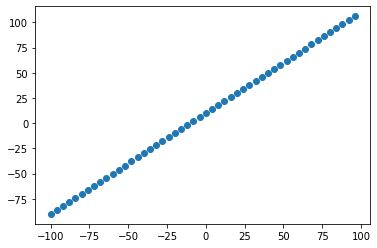

In [6]:
# visualize the data
import matplotlib.pyplot as plt

plt.scatter(x,y)

### the 3 sets ...


** training set -- the model learns from the data , which is typically 70-80% of the total data 

** validation set -- the model gets tuned on this data , which is typically 10-15% of the data avalilable 


** test set -- the model gets evaluated on this data to test what is has learned , this set is typically 10-15% of the data avaliable

In [7]:
# check the length of how many samples we have 

len(x)  # sample size is small so skip the validation set 

50

In [8]:
# split the data into train and test sets

x_train = x[:40] # first 40 (80% of data)
x_test = x[40:]# last 10 (20% of data)

In [9]:
y_train = y[:40]
y_test =y[40:]

In [10]:
len(x_train) , len(x_test) , len(y_train) , len(y_test)

(40, 10, 40, 10)

## visualizing the data 

now we've got our data in training and test sets

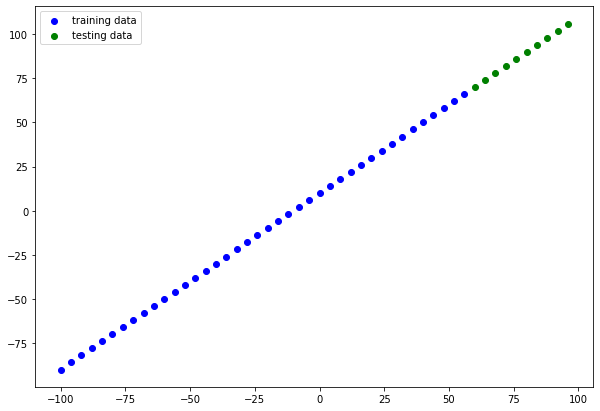

In [11]:
plt.figure(figsize=(10,7))
#plot training data in blue
plt.scatter(x_train,y_train,color='blue',label='training data')

# plot testing datain green
plt.scatter(x_test,y_test,c='green',label='testing data ')
#show a legend 
plt.legend()


In [12]:
# build the model 

model = tf.keras.Sequential(


[
    tf.keras.layers.Dense(1)
    
]
)

model.compile(loss=tf.keras.losses.mae , optimizer = tf.keras.optimizers.SGD() , metrics=['mae'])

# model.fit(x_train,y_train,epochs = 100)

In [13]:
# visualize the model

model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [14]:
x[0].shape # it is a scaler value

TensorShape([])

In [15]:
x[0] , y[0]

# the shape is 1 because we are passing one number to predict one number 

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [16]:
# lets create a model which builds automatically by defining the input shape on the first layer 

tf.random.set_seed(42)

# create a model

model =tf.keras.Sequential(


[
    tf.keras.layers.Dense(1,input_shape=[1])
    
]
)
#compile the model

model.compile(loss =tf.keras.losses.mae , optimizer = tf.keras.optimizers.SGD(lr=1.45),metrics=['mae'])



In [17]:
model.summary() # dense will be same as fully connected 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


** total paramters -- total number of parameters in the model 

** trainable parameters --these are the parameters (patterns ) the model can update as it trains 

** non-trainable params -- these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning)


**** resource ****
for a more in-depth overview of the trainable parameters within a layer , check out MIT's introduction to deep learning 

In [20]:
model.fit(x_train,y_train,epochs = 100 , verbose=0)

In [26]:
y_pred = model.predict(x_test)

1/1 [==============================] - 0s 101ms/step


In [27]:
y_pred

array([[ 76.447685],
       [ 81.37391 ],
       [ 86.30013 ],
       [ 91.22635 ],
       [ 96.15257 ],
       [101.07879 ],
       [106.00501 ],
       [110.93124 ],
       [115.85745 ],
       [120.783676]], dtype=float32)

In [28]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

#### converts a  keras model to dot format and save to file 
    
from tensorflow.keras.utils import plot_model

plt_model(model=model)

## visualize our model predictions 

to visualize predictions its a good idea to plot them against the ground truth tables 

often you'll see this in the form of y_test verses y_pred 

In [29]:
# calculate the mean absoulte error 

mae = tf.keras.losses.mae(y_true = y_test , y_pred = tf.constant(y_pred))

In [30]:
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.331388, 11.050436, 10.      , 10.24527 , 11.661029, 14.247273,
       18.005013, 22.931236, 27.857452, 32.783676], dtype=float32)>

In [31]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 76.447685],
       [ 81.37391 ],
       [ 86.30013 ],
       [ 91.22635 ],
       [ 96.15257 ],
       [101.07879 ],
       [106.00501 ],
       [110.93124 ],
       [115.85745 ],
       [120.783676]], dtype=float32)>

In [32]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [33]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 76.447685,  81.37391 ,  86.30013 ,  91.22635 ,  96.15257 ,
       101.07879 , 106.00501 , 110.93124 , 115.85745 , 120.783676],
      dtype=float32)>

In [34]:
# calculate the mean absoulte error

mae = tf.metrics.mean_absolute_error(y_true = y_test , y_pred = tf.squeeze(y_pred))

In [35]:
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.615682>

In [36]:
# make some preditions 

y_pred = model.predict(x_test)
y_pred

1/1 [==============================] - 0s 101ms/step


array([[ 76.447685],
       [ 81.37391 ],
       [ 86.30013 ],
       [ 91.22635 ],
       [ 96.15257 ],
       [101.07879 ],
       [106.00501 ],
       [110.93124 ],
       [115.85745 ],
       [120.783676]], dtype=float32)

In [37]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [38]:
# lets create a plotting function

def plot_predictions(train_data=x_train , train_lables = y_train ,test_data = x_test ,test_labels = y_test ,predictions = y_pred):
    '''plots training data , test data and compare predictions '''
    plt.figure(figsize=(10,7))
    # plot the training data
    plt.scatter(train_data , train_lables , c='b' , label='training_data')
    #plot the testing data
    plt.scatter(test_data , test_labels , c='green',label ='testing_data ')
    #plot model predictions
    plt.scatter(test_data , predictions , c='red',label='predictions')
    plt.legend()
    plt.show()

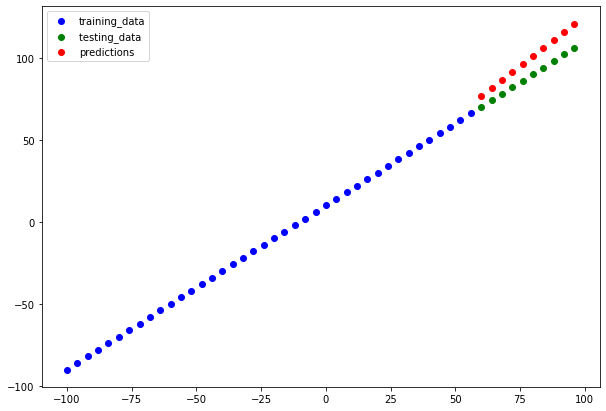

In [39]:
plot_predictions()

### evaluating our models predictions with regression evaluate metrics

depending on the problem we are working on ,there will be different evaluation metrics to evaluate your model performance 

since working on regression problem there are 2 techniques

1.MAE -- mean absolute error , 'on average , how wrong is each of my models predictions '

2.MSE -- mean sqaure error , 'squaring the average errors '

In [40]:
# evaluate the model on test 
model.evaluate(x_test , y_test)

1/1 [==============================] - 0s 393ms/step - loss: 10.6157 - mae: 10.6157


[10.615681648254395, 10.615681648254395]

In [41]:
#3 calculate the mean square error 

tf.keras.losses.mean_squared_error(y_true= y_test , y_pred = tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=119.77024>

In [61]:
# make some funtions to reuse mae , mse

def mae(y_true , y_pred):
    return tf.keras.losses.mean_absolute_error(y_true=y_true , y_pred = tf.squeeze(y_pred))
def mse(y_true , y_pred):
    return tf.keras.losses.mean_squared_error(y_true=y_true , y_pred = tf.squeeze(y_pred))


### running experiments to improve the model

1..get more data -- get more examples for your model to train

2. make your model larger (using a more complex model) -- this might come in the form of more layers or more hidden layers in each layer

3. train for longer -- give ur model more of a chance to find patterns in the data 


lets do 3 modelling experiments --

1. model_1 -- same  as the original model , 1 layer , trained for 100 epochs 

2. model_2 -- 2 layers , trained for 100 epochs 

3. model_3 -- 2 layers , trained for 500 epochs 

In [43]:
x_train , y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>)

In [47]:
# set random seed

tf.random.set_seed(42)

model_1 = tf.keras.Sequential(

[
    tf.keras.layers.Dense(1 , input_shape=[1])
]


)
model_1.compile(loss =tf.keras.losses.mae , optimizer = tf.keras.optimizers.SGD() , metrics = ['mae'])
model_1.fit(x_train , y_train ,epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 18ms/step - loss: 60.5234 - mae: 60.5234
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 25.7561 - mae: 25.7561
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 10.6988 - mae: 10.6988
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 13.2811 - mae: 13.2811
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 7.7782 - mae: 7.7782
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 10.6195 - mae: 10.6195
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 9.5738 - mae: 9.5738
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 9.0288 - mae: 9.0288
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 17.8524 - mae: 17.8524
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 9.6244 - mae: 9.6244
Epoch 11/100
2/2 [==============================] - 0s 9ms/step

In [51]:
# make and plot predictions of model_1

y_pred1 = model_1.predict(x_test)

1/1 [==============================] - 0s 139ms/step


In [52]:
y_pred1

array([[ 74.56932 ],
       [ 79.45499 ],
       [ 84.34065 ],
       [ 89.22631 ],
       [ 94.11198 ],
       [ 98.997635],
       [103.8833  ],
       [108.76897 ],
       [113.654625],
       [118.54029 ]], dtype=float32)

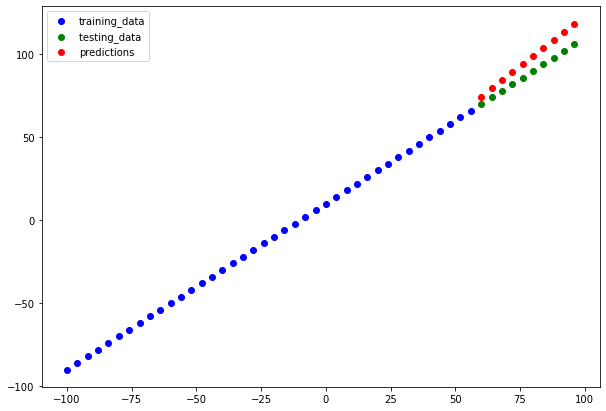

In [54]:
plot_predictions(predictions = y_pred1)

In [62]:
# calculate model_1  evaluation metrics

mae_1 =mae(y_test ,y_pred1)

mse_1 = mse(y_test , y_pred1)

mae_1 , mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.554807>,
 <tf.Tensor: shape=(), dtype=float32, numpy=79.656006>)

## model 2 

In [65]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential(

[
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1)
    
]

)

model_2.compile(loss = tf.keras.losses.mae , optimizer = tf.keras.optimizers.SGD() , metrics = ['mse'])

model_2.fit(x_train,y_train ,epochs= 100)

Epoch 1/100
2/2 [==============================] - 1s 15ms/step - loss: 65.3564 - mse: 6382.7725
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 19.2133 - mse: 581.3535
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 19.1556 - mse: 532.9695
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 13.8455 - mse: 246.9064
Epoch 5/100
2/2 [==============================] - 0s 13ms/step - loss: 15.3022 - mse: 299.3038
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 12.1469 - mse: 181.9157
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 11.4371 - mse: 158.6758
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 11.1819 - mse: 172.5601
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 41.5078 - mse: 2741.0400
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 28.7669 - mse: 1168.9590
Epoch 11/100
2/2 [=======================

In [66]:
y_pred2 = model_2.predict(x_test)

1/1 [==============================] - 0s 212ms/step


In [67]:
y_pred2

array([[ 78.22172 ],
       [ 83.31875 ],
       [ 88.415794],
       [ 93.51284 ],
       [ 98.60988 ],
       [103.706924],
       [108.80396 ],
       [113.90101 ],
       [118.998055],
       [124.09509 ]], dtype=float32)

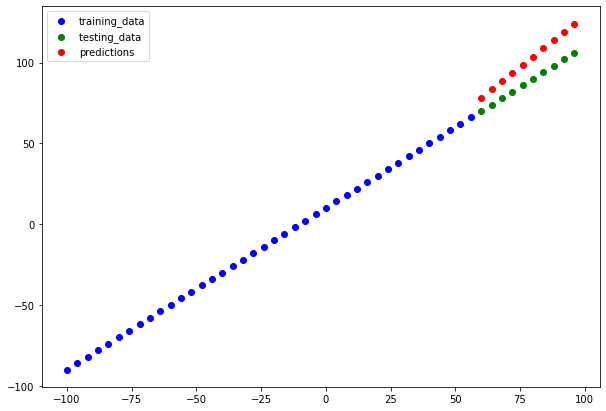

In [69]:
plot_predictions(predictions=y_pred2)

In [70]:
mae_2 = mae(y_test , y_pred2)
mse_2 = mse(y_test , y_pred2)

In [72]:
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=13.1584015>,
 <tf.Tensor: shape=(), dtype=float32, numpy=183.07243>)

### build model 3 

In [73]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential(


[
    
    tf.keras.layers.Dense(100,input_shape=[1]),
    tf.keras.layers.Dense(1)
    
])

model_2.compile(loss = tf.keras.losses.mae , optimizer = tf.keras.optimizers.SGD() , metrics = ['mse'])

model_2.fit(x_train , y_train ,epochs = 500)

Epoch 1/500
2/2 [==============================] - 1s 16ms/step - loss: 16.5397 - mse: 400.1829
Epoch 2/500
2/2 [==============================] - 0s 9ms/step - loss: 6.9261 - mse: 64.7808
Epoch 3/500
2/2 [==============================] - 0s 11ms/step - loss: 21.6665 - mse: 676.6884
Epoch 4/500
2/2 [==============================] - 0s 10ms/step - loss: 22.6498 - mse: 746.0246
Epoch 5/500
2/2 [==============================] - 0s 10ms/step - loss: 11.7942 - mse: 174.1944
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 9.4654 - mse: 101.0752
Epoch 7/500
2/2 [==============================] - 0s 9ms/step - loss: 10.5012 - mse: 145.1626
Epoch 8/500
2/2 [==============================] - 0s 9ms/step - loss: 12.8986 - mse: 242.9487
Epoch 9/500
2/2 [==============================] - 0s 11ms/step - loss: 26.7549 - mse: 1010.7064
Epoch 10/500
2/2 [==============================] - 0s 10ms/step - loss: 17.1213 - mse: 416.2694
Epoch 11/500
2/2 [===========================

In [74]:
y_pred3 = model_3.predict(x_test)

1/1 [==============================] - 0s 211ms/step


In [75]:
y_pred3

array([[-1.6231537],
       [-1.7313619],
       [-1.8395729],
       [-1.9477844],
       [-2.055997 ],
       [-2.1642027],
       [-2.272416 ],
       [-2.3806229],
       [-2.4888363],
       [-2.5970426]], dtype=float32)

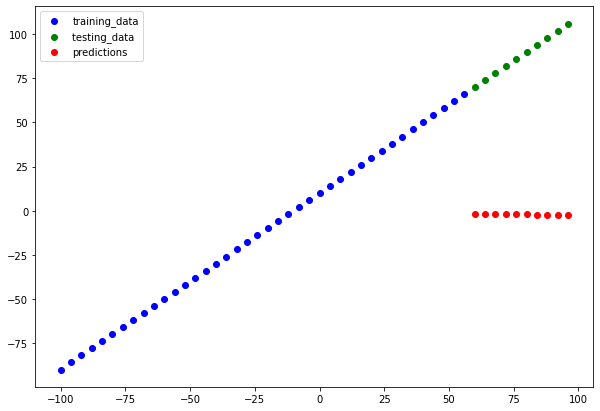

In [76]:
plot_predictions(predictions = y_pred3)


# here the model is trained for long time this is called overfitting 

In [77]:
mae_3 = mae(y_test , y_pred3)
mse_3 = mse(y_test , y_pred3)
mae_3 , mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=90.1101>,
 <tf.Tensor: shape=(), dtype=float32, numpy=8259.068>)

### comparing the results of our experiments 

In [79]:
# lets compare our model results using pandas DataFrame

import pandas as pd

model_results = [['model_1 ' , mae_1 ,mse_1] , ['model_2 ', mae_2,mse_2] , ['model_3', mae_3 , mse_3]]

all_results =pd.DataFrame(model_results , columns = ['model' , 'mae' , 'mse'])

all_results

,model,mae,mse
0,model_1,"tf.Tensor(8.554807, shape=(), dtype=float32)","tf.Tensor(79.656006, shape=(), dtype=float32)"
1,model_2,"tf.Tensor(13.1584015, shape=(), dtype=float32)","tf.Tensor(183.07243, shape=(), dtype=float32)"
2,model_3,"tf.Tensor(90.1101, shape=(), dtype=float32)","tf.Tensor(8259.068, shape=(), dtype=float32)"


In [80]:

model_results = [['model_1 ' , mae_1.numpy() ,mse_1.numpy()] , ['model_2 ', mae_2.numpy(),mse_2.numpy()] , ['model_3', mae_3.numpy() , mse_3.numpy()]]

all_results =pd.DataFrame(model_results , columns = ['model' , 'mae' , 'mse'])

all_results

,model,mae,mse
0,model_1,8.554807,79.656006
1,model_2,13.158401,183.072433
2,model_3,90.110100,8259.068359


In [81]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### tracking your experiments 

one really good habit in machine learning modelling is to track the results of your experiments ... 

and when doing so , it can be tedious if you're running lots of experiments 

luckily there are tools to help us 


* TensorBoard -- a component of the tensorflow library to help track modelling experiments 

* weights and biases -- a tool for tracking all kinds of machine learning experiments 

### saving our models 

saving our models allows us to use them outside wherever such as web application or mobile

there are 2 main formats to save a model

* the SavedModel format

* the HDF5 format

In [82]:
# save the model 

model_1.save('best_model_SavedModel_format')

INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


### HDF5 format  (hierarchical data file)

In [83]:
model_1.save('best_model_HDF5_format.h5')

d:\Users\Public\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [84]:
model_2.save('my_model.keras.h5')

# loading in a saved model

In [89]:
# load in the savedmodel format

loaded_SavedModel_format = tf.keras.models.load_model('best_model_SavedModel_format')
loaded_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [91]:
# compare model_2 predictions with SavedModel format model predictions

model_1_preds = model_1.predict(x_test)

loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(x_test)

model_1_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 179ms/step


1/1 [==============================] - 0s 202ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [92]:
# load in a model using the .h5 format
loaded_h5_format = tf.keras.models.load_model('best_model_HDF5_format.h5')
loaded_h5_format.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [93]:
# compare model_2 predictions with .h5 format model predictions


model_1_preds1 = model_1.predict(x_test)

loaded_h5_format_preds = loaded_h5_format.predict(x_test)

model_1_preds1 == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 155ms/step


1/1 [==============================] - 0s 203ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])